<font color = green >

## Home Task

</font>

Apply PCA to breast cancer dataset and visualize 2 principle components.

<font color = blue >

### Expected output

</font>

<img src = "img/breast_cancer_pca.png" align = 'left'>


<font color = green >

## Learn more
</font>

[numpy.cov](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html)

[Eigenvalues and eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors)

[numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html)

[sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA




In [11]:
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))

final_breast_data = np.concatenate([breast_data,labels],axis=1)


breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names



In [12]:
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
# breast_dataset.head()


In [13]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)
# breast_dataset.tail()


In [14]:
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x)

feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)


In [15]:
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast, columns = ['First principle component', 'Second principle component'])

<Figure size 432x288 with 0 Axes>

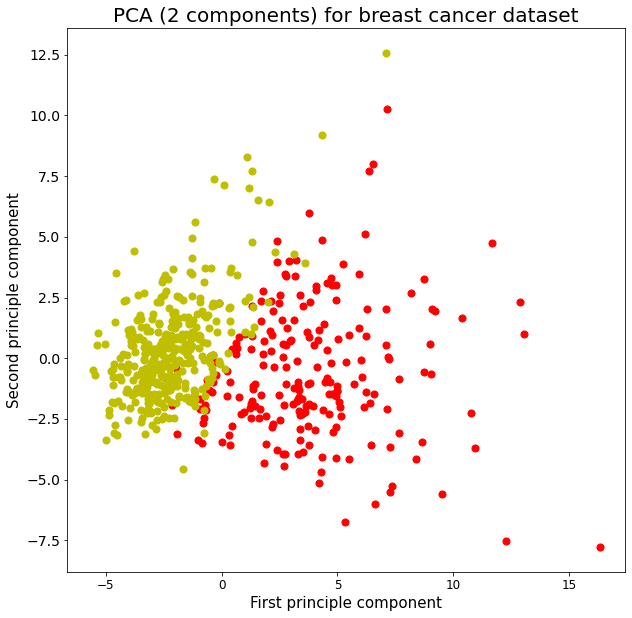

In [17]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('First principle component',fontsize=15)
plt.ylabel('Second principle component',fontsize=15)
plt.title("PCA (2 components) for breast cancer dataset",fontsize=20)
colors = ['r', 'y']
targets = ['Benign', 'Malignant']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'First principle component']
               , principal_breast_Df.loc[indicesToKeep, 'Second principle component'], c = color, s = 50)

